In [45]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [46]:
bench_mark_df = pd.read_csv('analyse.csv')
bench_mark_df = bench_mark_df.T
bench_mark_df.columns = bench_mark_df.loc['Name']
bench_mark_df = bench_mark_df.drop(['Name'])
bench_mark_df 

Name,"compute_lab_image(std::byte*, std::byte*, int, int, int)",[CUDA memcpy DtoH],[CUDA memcpy HtoD],"opening(std::byte*, int, int, int, int)","hysterisis_compute(std::byte*, int, int, int, int, int)","hysterisis_mark(std::byte*, int, int, int)","mask(std::byte*, std::byte*, int, int, int, float)",ConvertNV12BLtoNV12,"update_background(std::byte*, std::byte*, int, int)",[CUDA memset],MemsetD2D_BL
Type,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities
Time(%),58.453782,16.276829,13.599132,4.647176,2.814998,1.921588,1.281491,0.830668,0.102714,0.062001,0.009621
Time,173.800743,48.395926,40.434324,13.817457,8.369839,5.71346,3.810261,2.469828,0.305401,0.184348,0.028606
Calls,400,1200,801,400,400,400,400,400,13,64,10
Avg,434.501,40.329,50.479,34.543,20.924,14.283,9.525,6.174,23.492,2.88,2.86
Min,431.476,15.583,46.175,33.183,17.599,12.383,7.424,5.599,22.272,0.736,2.432
Max,443.092,97.437,76.158,44.255,31.071,23.199,19.999,15.36,24.832,3.36,3.615


In [47]:
function_regex = re.compile(r'([\w_]+)\(')
function_column = []
for col in bench_mark_df.columns:
    matches = function_regex.findall(col)
    if len(matches) > 0:
        function_column.append(matches[0])
        bench_mark_df.rename(columns={col: matches[0]}, inplace=True)
bench_mark_df[function_column] 


Name,compute_lab_image,opening,hysterisis_compute,hysterisis_mark,mask,update_background
Type,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities
Time(%),58.453782,4.647176,2.814998,1.921588,1.281491,0.102714
Time,173.800743,13.817457,8.369839,5.71346,3.810261,0.305401
Calls,400,400,400,400,400,13
Avg,434.501,34.543,20.924,14.283,9.525,23.492
Min,431.476,33.183,17.599,12.383,7.424,22.272
Max,443.092,44.255,31.071,23.199,19.999,24.832


In [48]:
bench_mark_df = bench_mark_df[function_column]
bench_mark_df.loc['Type']
bench_mark_df = bench_mark_df.drop(['Type'])
bench_mark_df = bench_mark_df.astype(float)
bench_mark_df

Name,compute_lab_image,opening,hysterisis_compute,hysterisis_mark,mask,update_background
Time(%),58.453782,4.647176,2.814998,1.921588,1.281491,0.102714
Time,173.800743,13.817457,8.369839,5.713460,3.810261,0.305401
Calls,400.000000,400.000000,400.000000,400.000000,400.000000,13.000000
Avg,434.501000,34.543000,20.924000,14.283000,9.525000,23.492000
Min,431.476000,33.183000,17.599000,12.383000,7.424000,22.272000
Max,443.092000,44.255000,31.071000,23.199000,19.999000,24.832000


In [100]:
%%file bench_mark.py
import pandas as pd
import numpy as np
import re
import argparse
import os
parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('-f','--file', type=str, default='analyse.csv',
                    help='file name')
parser.add_argument('-o','--output-file', type=str, default='analyse.csv',
                    help='output file name')
csv_file = parser.parse_args().file
output_file = parser.parse_args().output_file

if csv_file is None:
    csv_file = 'analyse.csv'
if output_file is None:
    output_file = 'clean_benchmark.csv'
    
if not os.path.exists(csv_file):
    print('File not found')
    exit(1)

def generate_clean_benchmark(csv_file):
    bench_mark_df = pd.read_csv(csv_file)
    bench_mark_df.iloc[0] = bench_mark_df.iloc[0].fillna('')
    for col in bench_mark_df.columns:
        if bench_mark_df.loc[0,col] != '':
            bench_mark_df.rename(columns={col: f'{col} ({bench_mark_df.loc[0,col]})'}, inplace=True)
    bench_mark_df = bench_mark_df.drop([0])
    bench_mark_df
    bench_mark_df = bench_mark_df.T
    bench_mark_df.columns = bench_mark_df.loc['Name']
    bench_mark_df = bench_mark_df.drop(['Name'])
    function_regex = re.compile(r'([\w_]+)\(')
    function_column = []
    for col in bench_mark_df.columns:
        
        matches = function_regex.findall(col)
        if len(matches) > 0:
            function_column.append(matches[0])
            bench_mark_df.rename(columns={col: matches[0]}, inplace=True)
    bench_mark_df[function_column] 
    bench_mark_df = bench_mark_df[function_column]
    bench_mark_df.loc['Type']
    bench_mark_df = bench_mark_df.drop(['Type'])
    bench_mark_df = bench_mark_df.astype(float)
    bench_mark_df.to_csv('clean_benchmark.csv')
    return bench_mark_df



df = generate_clean_benchmark(csv_file)
print(df)

Overwriting bench_mark.py


In [99]:
def generate_clean_benchmark(csv_file):
    bench_mark_df = pd.read_csv(csv_file)
    bench_mark_df.iloc[0] = bench_mark_df.iloc[0].fillna('')
    for col in bench_mark_df.columns:
        if bench_mark_df.loc[0,col] != '':
            bench_mark_df.rename(columns={col: f'{col} ({bench_mark_df.loc[0,col]})'}, inplace=True)
    bench_mark_df = bench_mark_df.drop([0])
    bench_mark_df
    bench_mark_df = bench_mark_df.T
    bench_mark_df.columns = bench_mark_df.loc['Name']
    bench_mark_df = bench_mark_df.drop(['Name'])
    function_regex = re.compile(r'([\w_]+)\(')
    function_column = []
    for col in bench_mark_df.columns:
        
        matches = function_regex.findall(col)
        if len(matches) > 0:
            function_column.append(matches[0])
            bench_mark_df.rename(columns={col: matches[0]}, inplace=True)
    bench_mark_df[function_column] 
    bench_mark_df = bench_mark_df[function_column]
    bench_mark_df.loc['Type']
    bench_mark_df = bench_mark_df.drop(['Type'])
    bench_mark_df = bench_mark_df.astype(float)
    bench_mark_df.to_csv('clean_benchmark.csv')
    return bench_mark_df

bench_mark_df = generate_clean_benchmark('analyse.csv')
print(bench_mark_df)

Name         compute_lab_image     opening  hysterisis_compute  \
Time(%) (%)          51.904323    4.072270            2.454387   
Time (ms)           173.849628   13.639761            8.220785   
Calls               400.000000  400.000000          400.000000   
Avg (us)            434.624000   34.099000           20.551000   
Min (us)            430.936000   32.896000           17.568000   
Max (us)            446.840000   43.263000           29.695000   

Name         hysterisis_mark        mask  update_background  
Time(%) (%)         1.689524    1.089415           0.088658  
Time (ms)           5.658933    3.648914           0.296953  
Calls             400.000000  400.000000          13.000000  
Avg (us)           14.147000    9.122000          22.842000  
Min (us)           12.352000    7.328000          21.888000  
Max (us)           23.072000   17.376000          23.903000  


/tmp/ipykernel_22383/1311543988.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bench_mark_df.iloc[0] = bench_mark_df.iloc[0].fillna('')


In [70]:
bench_mark_df.loc[0,'Type']

''

In [98]:
%%file get_time.py
import re
import sys
def get_execution_time(log_file):
    with open(log_file, "r") as file:
        log_content = file.read()

    # Utilisation d'une expression régulière pour extraire le temps après "Execution ended after"
    match = re.search(r'Execution ended after (\S+)', log_content)
    if match:
        time_after_execution = match.group(1)
        print(f"Temps après l'exécution : {time_after_execution}")
    else:
        print("Aucune correspondance trouvée.")

get_execution_time(sys.argv[1])

Overwriting get_time.py


In [89]:
bench_mark_df.rename(index={'Time': 'Time (ms)'}, inplace=True)


KeyError: "['Time(%)'] not found in axis"

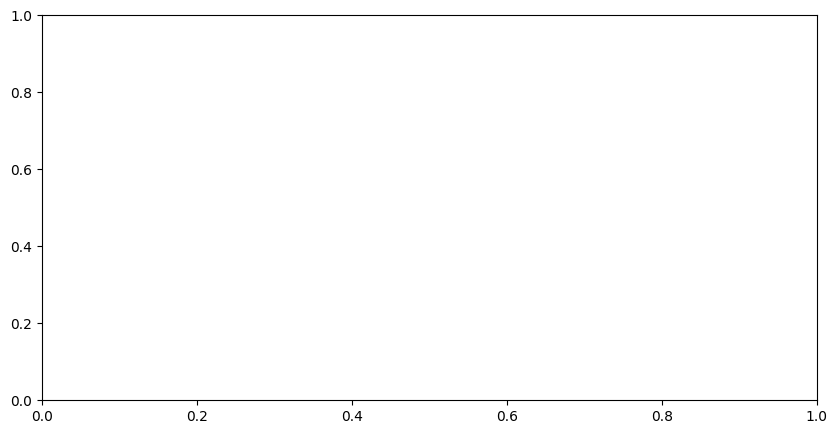

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
transposed_df = (bench_mark_df.drop(['Calls','Time(%)']).T)

transposed_df.plot(ax=ax, kind='bar',  rot=0)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Function')
fig.tight_layout()
fig.savefig('benchmark1.png')

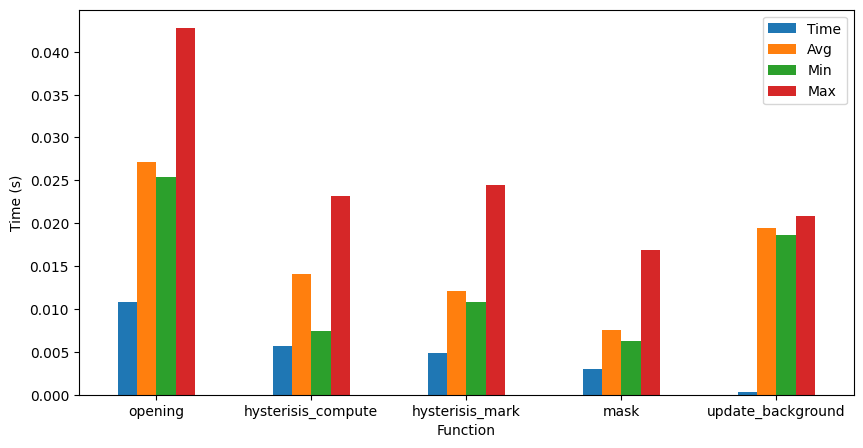

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
transposed_df = (bench_mark_df.drop(['Calls','Time(%)']).T)

transposed_df.drop(['compute_lab_image']).plot(ax=ax, kind='bar',  rot=0)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Function')
fig.savefig('benchmark.png')